In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

#from api_key import api_key
#api_key

In [2]:
voter_csv = "oldData/VOTER_Survey_December16_Release1.csv"

voter_df = pd.read_csv(voter_csv)

voter_df.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (423,564) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_identifier,weight,PARTY_AGENDAS_rand_2016,pp_primary16_2016,pp_demprim16_2016,pp_repprim16_2016,inputstate_2016,izip_2016,votereg2_2016,votereg_f_2016,...,post_HouseCand3Name_2012,post_HouseCand3Party_2012,post_SenCand1Name_2012,post_SenCand1Party_2012,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2016,endtime_2016
0,779,0.358213,Republican Party,In the Democratic primary,Hillary Clinton,NaN,California,94952,Yes,Yes,...,NaN,NaN,Shelley Berkley,Democratic,Dean Heller,Republican,NaN,NaN,11/29/16 22:59,11/29/16 23:28
1,2108,0.562867,Republican Party,In the Republican primary,NaN,Donald Trump,Arizona,85298,Yes,Yes,...,NaN,NaN,Richard Carmona,Democratic,Jeff Flake,Republican,NaN,NaN,11/29/16 15:41,11/29/16 18:58
2,2597,0.552138,Republican Party,In the Democratic primary,Hillary Clinton,NaN,Wisconsin,54904,Yes,Yes,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,11/29/16 16:08,11/29/16 16:32
3,4148,0.207591,Democratic Party,In the Democratic primary,Someone else,NaN,Oklahoma,74104,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/14/16 18:46,12/14/16 19:11
4,4460,0.333729,Republican Party,In the Republican primary,NaN,Marco Rubio,Texas,78253,Yes,Yes,...,NaN,NaN,Paul Sadler,Democratic,Ted Cruz,Republican,NaN,NaN,12/1/16 10:17,12/1/16 10:59


In [3]:
cleanVoter = voter_df.loc[:, ["case_identifier","inputstate_2016","healthcov2_2016","educ_2016","marstat_2016","faminc_2016","presvote16post_2016"]]

cleanVoter = pd.DataFrame(cleanVoter).reindex()

cleanVoter.head()

,case_identifier,inputstate_2016,healthcov2_2016,educ_2016,marstat_2016,faminc_2016,presvote16post_2016
0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,Prefer not to say,Hillary Clinton
1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$60,000 - $69,999",Donald Trump
2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$50,000 - $59,999",Hillary Clinton
3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$70,000 - $79,999",Gary Johnson
4,4460,Texas,Other,4-year,Married,"$40,000 - $49,999",Donald Trump


In [4]:
cleanVoter.to_csv('cleanVoter.csv')

In [5]:
cleanVoter_csv = "cleanVoter.csv"

cleanVoter_df = pd.read_csv(cleanVoter_csv)

cleanVoter_df.head()

,Unnamed: 0,case_identifier,inputstate_2016,healthcov2_2016,educ_2016,marstat_2016,faminc_2016,presvote16post_2016
0,0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,Prefer not to say,Hillary Clinton
1,1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$60,000 - $69,999",Donald Trump
2,2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$50,000 - $59,999",Hillary Clinton
3,3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$70,000 - $79,999",Gary Johnson
4,4,4460,Texas,Other,4-year,Married,"$40,000 - $49,999",Donald Trump


In [6]:
cleanVoter2 = cleanVoter.reset_index(drop=True)
cleanVoter2.head()

,case_identifier,inputstate_2016,healthcov2_2016,educ_2016,marstat_2016,faminc_2016,presvote16post_2016
0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,Prefer not to say,Hillary Clinton
1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$60,000 - $69,999",Donald Trump
2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$50,000 - $59,999",Hillary Clinton
3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$70,000 - $79,999",Gary Johnson
4,4460,Texas,Other,4-year,Married,"$40,000 - $49,999",Donald Trump


In [8]:
cleanVoter2.rename(columns={"case_identifier": "Case ID",
                           "inputstate_2016": "State",
                           "healthcov2_2016": "Health Care",
                           "educ_2016": "Education",
                           "marstat_2016": "Marital Status",
                           "faminc_2016": "Household Income",
                           "presvote16post_2016": "Candidate Voted For"})

,Case ID,State,Health Care,Education,Marital Status,Household Income,Candidate Voted For
0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,Prefer not to say,Hillary Clinton
1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$60,000 - $69,999",Donald Trump
2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$50,000 - $59,999",Hillary Clinton
3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$70,000 - $79,999",Gary Johnson
4,4460,Texas,Other,4-year,Married,"$40,000 - $49,999",Donald Trump
5,5225,California,"I'm covered by a government plan, such as Medi...",2-year,Married,"$30,000 - $39,999",Hillary Clinton
6,5903,Kentucky,I have private insurance or belong to an HMO.,Post-grad,Married,"$120,000 - $149,999",Hillary Clinton
7,6059,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Married,Prefer not to say,Donald Trump
8,8048,California,I have private insurance or belong to an HMO.,4-year,Married,"$200,000 - $249,999",Hillary Clinton
9,9869,Vermont,"I'm covered by a government plan, such as Medi...",Some college,Divorced,"$20,000 - $29,999",Hillary Clinton


In [9]:
cleanVoter2.count()

case_identifier        8000
inputstate_2016        8000
healthcov2_2016        7424
educ_2016              8000
marstat_2016           7998
faminc_2016            8000
presvote16post_2016    7606
dtype: int64

In [12]:
cleanVoter2 = cleanVoter2.dropna(how = "any")
cleanVoter2.count()

case_identifier        7089
inputstate_2016        7089
healthcov2_2016        7089
educ_2016              7089
marstat_2016           7089
faminc_2016            7089
presvote16post_2016    7089
dtype: int64

In [25]:
cleanVoter2['presvote16post_2016'].unique()

array(['Hillary Clinton', 'Donald Trump', 'Gary Johnson', 'Other',
       'Jill Stein', 'Evan McMullin', 'Did not vote for President'],
      dtype=object)

In [39]:
cleanVoter2['marstat_2016'].unique()

array(['Widowed', 'Married', 'Single', 'Divorced', 'Domestic partnership',
       'Separated'], dtype=object)

In [40]:
Group_By_Candidate = cleanVoter2.set_index('presvote16post_2016').groupby(['presvote16post_2016'])

In [54]:
HC = cleanVoter2.loc[cleanVoter2['presvote16post_2016'] == 'Hillary Clinton'].groupby('marstat_2016')["case_identifier"].count()
DT = cleanVoter2.loc[cleanVoter2['presvote16post_2016'] == 'Donald Trump'].groupby('marstat_2016')["case_identifier"].count()
cleanVoter3 = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})

cleanVoter3 = cleanVoter3[['Hillary Clinton','Donald Trump']]
cleanVoter3.index.name = "marstat_2016"
cleanVoter3

,Hillary Clinton,Donald Trump
marstat_2016,,
Divorced,427,347
Domestic partnership,139,60
Married,1838,2233
Separated,48,32
Single,666,313
Widowed,223,244


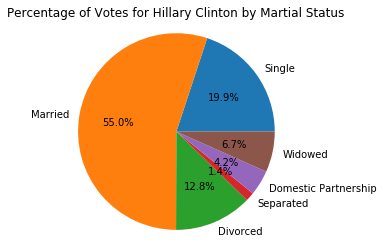

In [61]:
labels = 'Single','Married','Divorced','Separated','Domestic Partnership','Widowed'
values = [666, 1838, 427, 48, 139, 223]

fig1, ax1 = plt.subplots()
plt.title("Percentage of Votes for Hillary Clinton by Martial Status")
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("Percentage of Votes for Hillary Clinton by Martial Status")
plt.show()

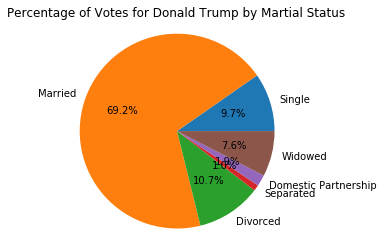

In [62]:
labels = 'Single','Married','Divorced','Separated','Domestic Partnership','Widowed'
values = [313, 2233, 347, 32, 60, 244]

fig1, ax1 = plt.subplots()
plt.title("Percentage of Votes for Donald Trump by Martial Status")
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("Percentage of Votes for Donald Trump by Martial Status")
plt.show()

In [63]:
cleanVoter2['educ_2016'].unique()

array(['4-year', 'Some college', 'High school graduate', '2-year',
       'Post-grad', 'No HS'], dtype=object)

In [64]:
HC = cleanVoter2.loc[cleanVoter2['presvote16post_2016'] == 'Hillary Clinton'].groupby('educ_2016')["case_identifier"].count()
DT = cleanVoter2.loc[cleanVoter2['presvote16post_2016'] == 'Donald Trump'].groupby('educ_2016')["case_identifier"].count()
cleanVoter3 = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})

cleanVoter3 = cleanVoter3[['Hillary Clinton','Donald Trump']]
cleanVoter3.index.name = "educ_2016"
cleanVoter3

,Hillary Clinton,Donald Trump
educ_2016,,
2-year,339,368
4-year,924,745
High school graduate,606,901
No HS,36,77
Post-grad,706,442
Some college,730,696


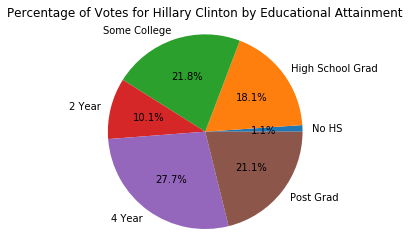

In [66]:
labels = 'No HS','High School Grad','Some College','2 Year','4 Year','Post Grad'
values = [36, 606, 730, 339, 924, 706]

fig1, ax1 = plt.subplots()
plt.title("Percentage of Votes for Hillary Clinton by Educational Attainment")
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("Percentage of Votes for Hillary Clinton by Educational Attainment")
plt.show()

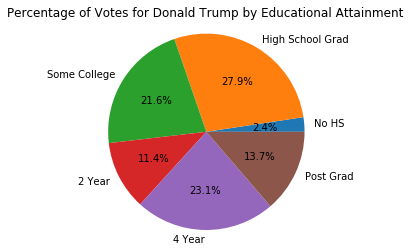

In [65]:
labels = 'No HS','High School Grad','Some College','2 Year','4 Year','Post Grad'
values = [77, 901, 696, 368, 745, 442]

fig1, ax1 = plt.subplots()
plt.title("Percentage of Votes for Donald Trump by Educational Attainment")
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("Percentage of Votes for Donald Trump by Educational Attainment")
plt.show()

In [ ]:
#What's left
#Change educational attainment to a bar graph
#Create data frames and charts income (scatter with both candidates), state(google API), health care (bar)
#Create presentation